In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://www.smh.com.au/interactive/2020/coronavirus/data-feeder/covid-19-lga-etc-csv-global-nations-latest.csv")

In [3]:
df

,id,area,cases,deaths,recovered,lat,lng,population
0,us,US,7332200,208695,2873369,38.00,-97.00,332800982
1,india,India,6394068,99773,5352078,20.00,77.00,1371272434
2,brazil,Brazil,4847092,144680,4299659,-10.00,-55.00,210147125
3,russia,Russia,1188928,20981,966724,60.00,100.00,146644718
4,colombia,Colombia,841532,26397,753953,4.00,-72.00,48258134
...,...,...,...,...,...,...,...,...
183,laos,Laos,23,0,22,18.00,105.00,7275556
184,saint-kitts-and-nevis,Saint Kitts and Nevis,19,0,17,17.33,-62.75,53192
185,holy-see,Holy See,12,0,12,41.90,12.45,809
186,western-sahara,Western Sahara,10,1,8,24.50,-13.00,597330


In [4]:
df.shape

(188, 8)

In [5]:
df.head()

,id,area,cases,deaths,recovered,lat,lng,population
0,us,US,7332200,208695,2873369,38.0,-97.0,332800982
1,india,India,6394068,99773,5352078,20.0,77.0,1371272434
2,brazil,Brazil,4847092,144680,4299659,-10.0,-55.0,210147125
3,russia,Russia,1188928,20981,966724,60.0,100.0,146644718
4,colombia,Colombia,841532,26397,753953,4.0,-72.0,48258134


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          188 non-null    object 
 1   area        188 non-null    object 
 2   cases       188 non-null    int64  
 3   deaths      188 non-null    int64  
 4   recovered   188 non-null    int64  
 5   lat         188 non-null    float64
 6   lng         188 non-null    float64
 7   population  188 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 11.9+ KB


In [7]:
mask = ((df["lng"]>-20)&(df["lng"]<40))&((df.lat>35)&(df.lat<70))
dfeu = df.loc[mask]

In [8]:
dfeu.head()

,id,area,cases,deaths,recovered,lat,lng,population
6,spain,Spain,789932,32086,150376,40.00,-4.00,46937060
10,france,France,629431,32171,100253,46.00,2.00,68156507
11,united-kingdom,United Kingdom,469769,42358,2389,54.00,-2.00,66970354
17,turkey,Turkey,321512,8325,282657,39.00,35.00,84339067
18,italy,Italy,319908,35941,229970,42.83,12.83,60361006


In [9]:
dfeu.drop(columns= ["lat","lng"], inplace=True)

C:\Users\MADCAT\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
dfeu.head()

,id,area,cases,deaths,recovered,population
6,spain,Spain,789932,32086,150376,46937060
10,france,France,629431,32171,100253,68156507
11,united-kingdom,United Kingdom,469769,42358,2389,66970354
17,turkey,Turkey,321512,8325,282657,84339067
18,italy,Italy,319908,35941,229970,60361006


In [15]:
dfeu = dfeu.sort_values(by = "area")

In [16]:
dfeu.head()

,id,area,cases,deaths,recovered,population
91,albania,Albania,13965,389,8342,2877800
145,andorra,Andorra,2110,53,1540,77265
63,austria,Austria,46374,803,37186,9006400
46,belarus,Belarus,79421,844,74982,9449321
32,belgium,Belgium,124234,10037,19521,11589616


In [19]:
dfeu.reset_index(inplace=True)

In [22]:
dfeu.drop(columns=["index", "id"], inplace = True)


<AxesSubplot:>

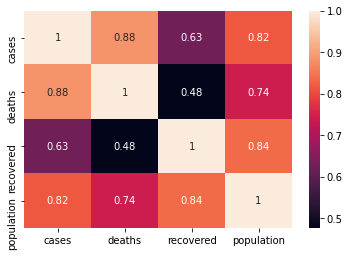

In [30]:
sns.heatmap(dfeu.corr(),annot=True)

## Avrupa geneli Covid -19 verilerine ilk bakışta;
### 1. Nüfus ile ölümler ,vaka sayısı ve iyileşme arasında pozitif kuvvetli bir ilişki olduğu, 
### 2. Vaka sayısı ile ölümlerin çok kuvvetli pozitif bir korelasyonu olmasına rağmen iyileşenleri sayısı ile kuvvetli bir korelasyonu olduğu,
### 3 . Ölümler ile iyileşenlerin arasındaortalama bir korelasyon oluğu,
### görülmektedir.